In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jieba
import wordcloud
import re
import collections

In [194]:
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [195]:
# df = pd.read_csv('通信.csv').drop(index=0)
df = pd.read_excel('科普图书数据.xlsx')
bookRatings = df["bookRating"]
bookNames = df["bookName"]
bookRatingPeoples = df["bookRatingPeople"]
bookRatingPeoplesList = bookRatingPeoples
# bookRatingPeoplesList = []
# for i in bookRatingPeoples:
#     if type(i) == str:
#         i = i.replace("人评价", "").replace(")", "").replace("(", "")
#     else:
#         i = 0
#     bookRatingPeoplesList.append(int(i))

In [196]:
colors = []
for _ in range(int(len(bookRatings) / 2)):
    colors.append([_ / int(len(bookRatings) / 2), 0.5, 0.5])
colors = colors + colors[::-1]

f:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8226 missing from current font.
  font.set_text(s, 0.0, flags=flags)
f:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8226 missing from current font.
  font.set_text(s, 0, flags=flags)


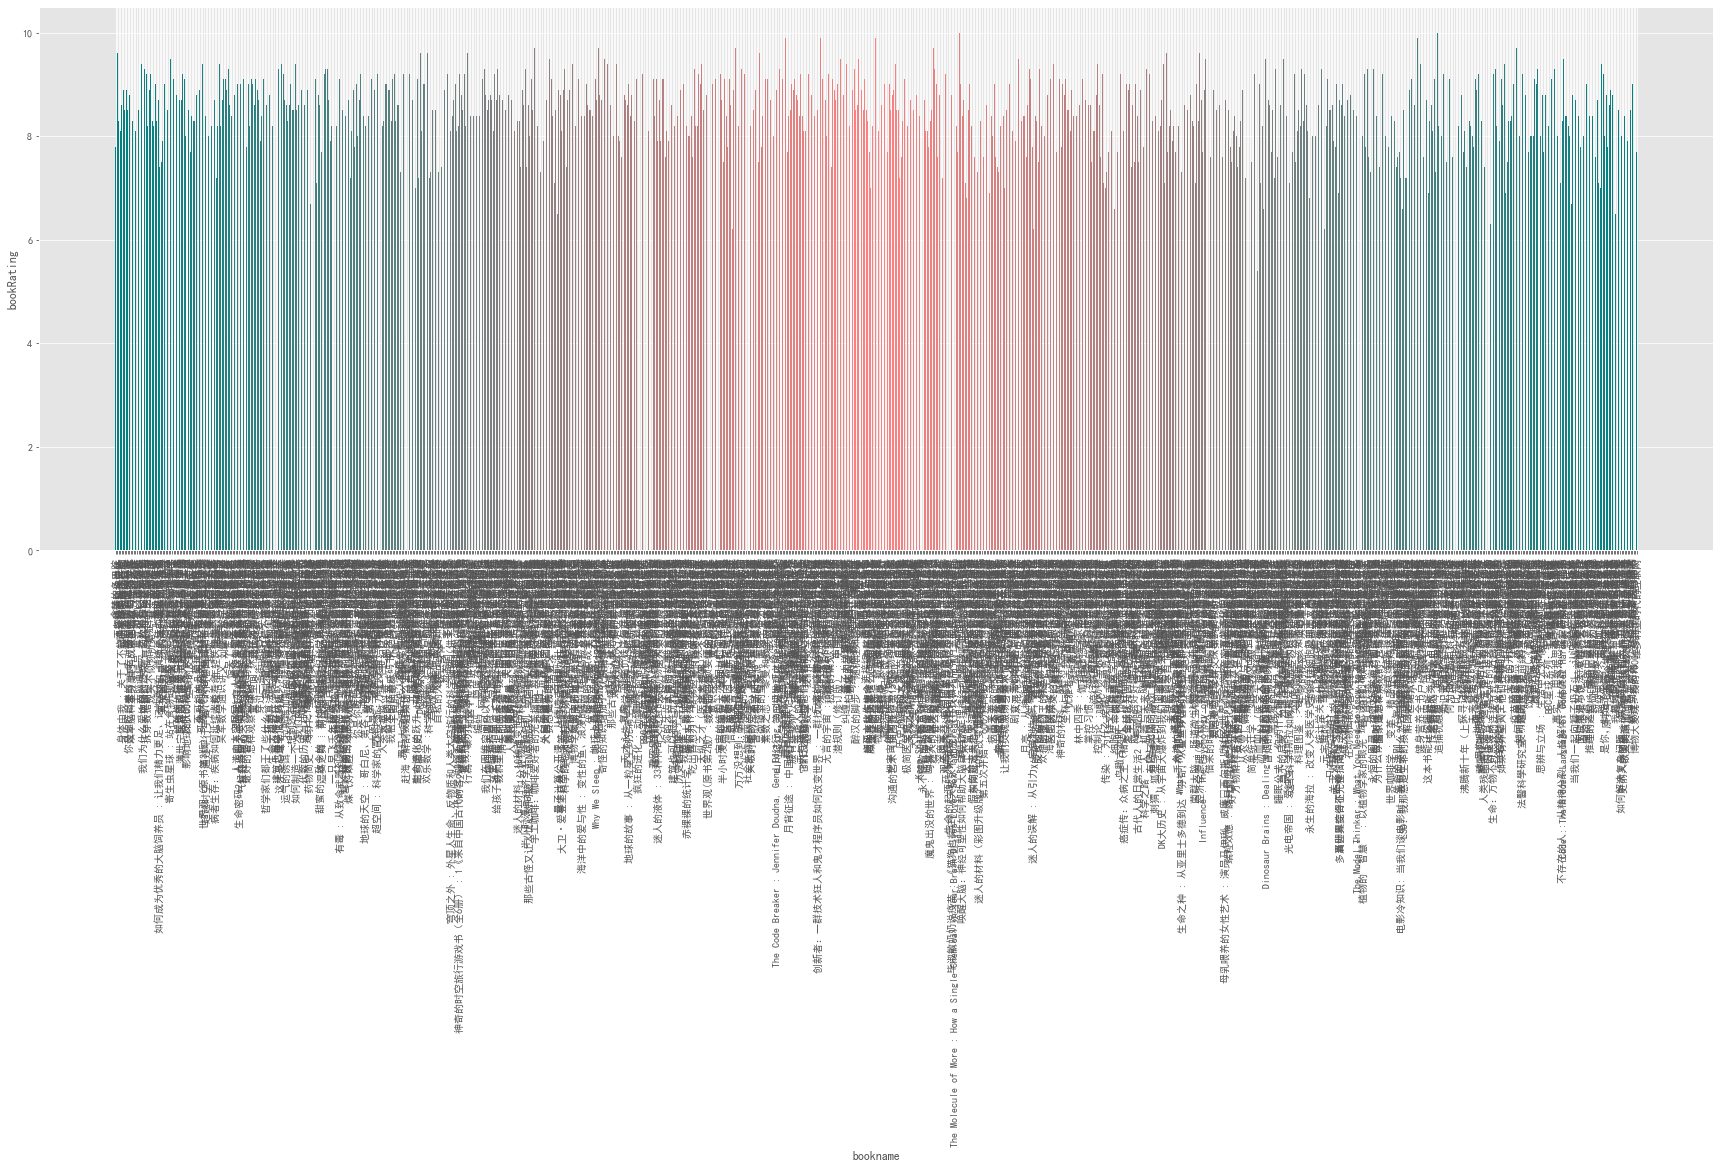

In [197]:
plt.figure(figsize=(30, 10))
plt.style.use("ggplot")
plt.bar(range(len(bookRatings)),bookRatings, label='通信',width=0.5,color=colors)
plt.xlabel('bookname')
plt.xticks(range(0,len(bookNames),1),list(bookNames)[::1],rotation=90)
plt.ylabel('bookRating')
plt.show()

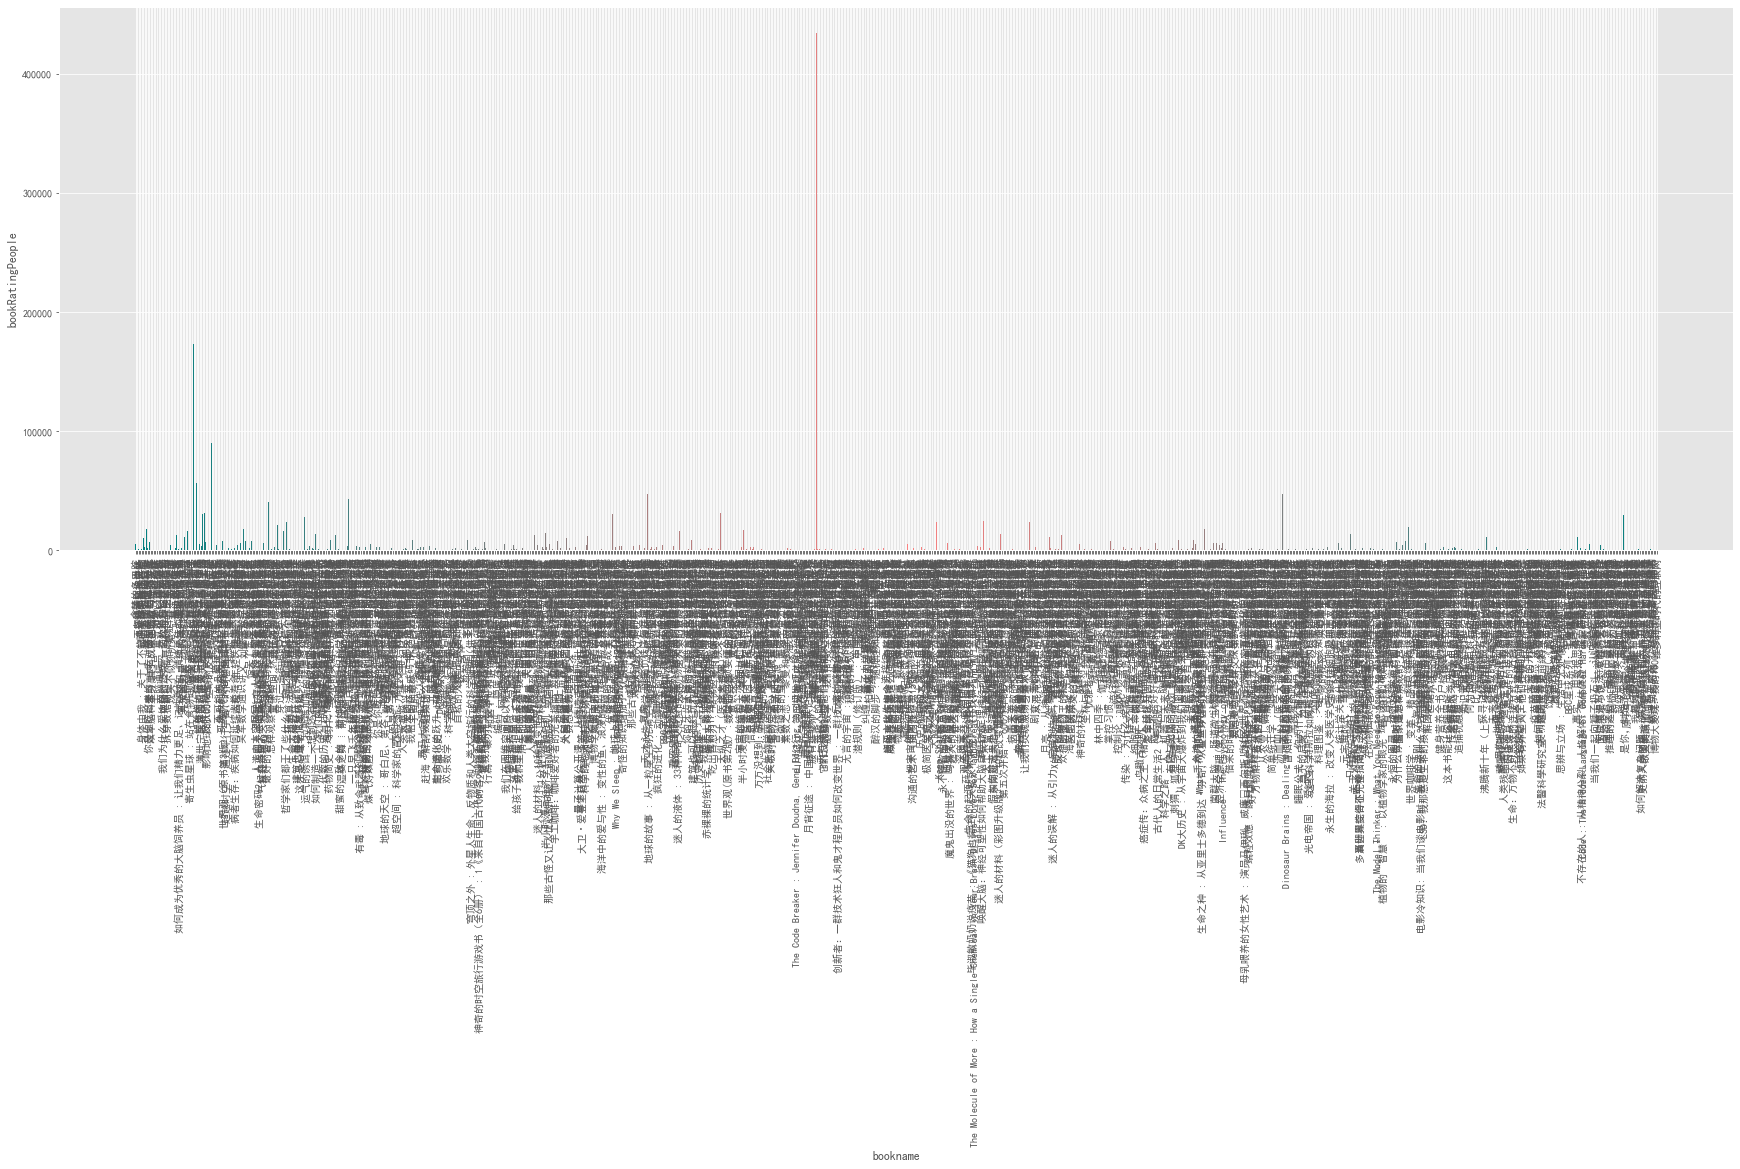

In [198]:
plt.figure(figsize=(30, 10))
plt.bar(range(len(bookRatingPeoplesList)),bookRatingPeoplesList, label='通信',width=0.5,color=colors)
plt.xlabel('bookname')
plt.xticks(range(0,len(bookNames),1),list(bookNames)[::1],rotation=90)
plt.ylabel('bookRatingPeople')
plt.show()

In [199]:
print('每本书平均{:.3f}分'.format(np.mean(bookRatings)))
print('每本书平均{:.3f}人评价'.format(np.mean(bookRatingPeoplesList)))
print('评分最高的是{}'.format(df['bookName'][df['bookRating'] == np.max(bookRatings)].values[0]))
print('评价最多的是{}'.format(df['bookName'][df['bookRatingPeople'].idxmax()]))

每本书平均8.451分
每本书平均2621.800人评价
评分最高的是山川纪行：第三极发现之旅 : 臧穆科学考察手记
评价最多的是三体 : “地球往事”三部曲之一


In [200]:
text = ''
for i in df['bookIntro']:
    text += (str)(i)
pattern = re.compile(r"[^a-zA-Z0-9\u4e00-\u9fa5]")
text = re.sub(pattern, "", text)
listText = jieba.cut(text, cut_all=False, HMM=True)
object_list = []

# 去除停用词（去掉一些意义不大的词，如标点符号、嗯、啊等）
with open('baidu_stopwords.txt', 'r', encoding='UTF-8') as meaninglessFile:
    stopwords = set(meaninglessFile.read().split('\n'))
stopwords.add(' ')
for word in listText:         # 循环读出每个分词
    if word not in stopwords:       # 如果不在去除词库中
        object_list.append(word)    # 分词追加到列表
word_counts = collections.Counter(object_list)       # 对分词做词频统计
word_counts_top = word_counts.most_common(100)       # 获取前100最高频的词

<Figure size 432x288 with 0 Axes>

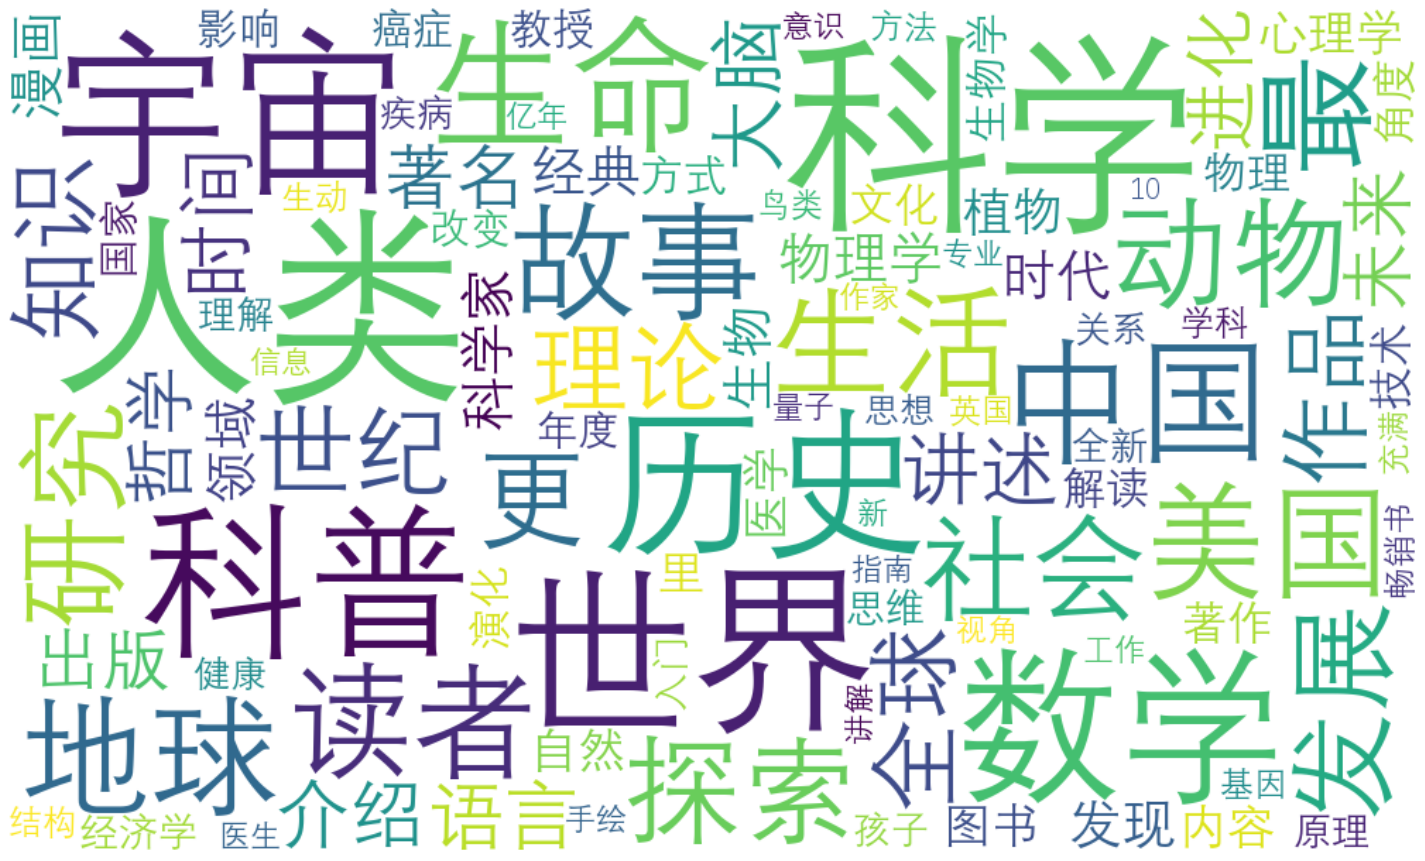

In [201]:
wc = wordcloud.WordCloud(
    font_path = 'C:\Windows\Fonts\Deng.ttf', # 设置字体（这里选择“仿宋”）
    background_color='white',                   # 背景颜色                              # 文字颜色+形状（有mask参数再设定宽高是无效的）
    max_words = 100,                         # 显示词数
    max_font_size = 150,                        # 最大字号
    random_state = 42,                          # 随机数
    width = 1000,                               # 宽度
    height = 600,                               # 高度
    margin = 2,                                 # 边缘
)

wc.generate_from_frequencies(word_counts)                                        # 从字典生成词云
wc.to_file('词频.png')                                                  # 保存图片
plt.figure('词云')                                                               # 弹框名称与大小
plt.figure(figsize=(20, 20))
plt.subplots_adjust(top=0.99,bottom=0.01,right=0.99,left=0.01,hspace=0,wspace=0) # 调整边距
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')                       # 处理词云
plt.axis('off')                                                                  # 关闭坐标轴
plt.show()  

In [2]:
text = "如果要了解互联网，这本是必读之书。 最近在看这本书和李开复的《世界因你不同》，无意中发现这两本书竟颇为互补──李同学是以自己亲身在苹果，微软，google等的工作经验来谈，更为感性和detail。。而吴同学则更以一种理性的旁观者态度来分析这些IT公司的朝代更替原因。恰恰，李博士几乎在每个IT公司势旺时进入，在势弱时退出。恰好吻合了吴同学的兴衰时间表。。没看过这两本书的同学推荐一起看。 写得很差，完全不建议阅读。 #恒阅# 这本书给人最大 的启发就是：一个企业能不能活可能是靠自己，但是死不死真的是靠命啊……什么企业基因论，不就是宿命吗？另外，作为一本介绍行业历史的书，如果一定要总结出一些规律，就必须做更深入严谨的研究，否则就可能出现本书的问题：同样的逻辑用在不同的企业案例上会出现矛盾…… 普及性介绍没有什么洞见9.1分有过誉之嫌 一本故事会，想不明白这本书在豆瓣上为什么得分这么高。先不说书中的观点是否值得商榷，单是书中举的事实例子就有不少是错的，比如把第一代Apple TV说成是豆腐块了。 又是一本被吹捧、炒作的书。 老实说，就着二手资料能写出这么一本书来我很惊讶，毫无干货。如果愿意了解各公司历史的尚可以一看，但这个网上都有啊。 细致、全面，绝佳的入门书，只是这个领域的判断众说纷纭，就像张小龙的“我所说的都是错的”，即使再言之凿凿也未必准确。不知道新入门者从此对互联网的认识，有多少已经潜移默化打上了吴军的印记，未必是好事。 一般一般，中国人特有的成功学气味太重。没有挣大钱或者很有社会影响就不重要吗？未必。。。 语气太随意，不是一本严肃作品。 很棒的了解IT领域的入门读物，全面且逻辑清晰。以IT界的科技变革为基础，到产业组织以及与资本的博弈，深刻而全面。 几个定律加公司兴衰，读出了三体的感觉，很爽。 有些章不错，但不算是出色的企业历史书，比如突兀的人称切换，比如洋洋洒洒的叙述。PS站在下一个浪潮巅峰的朋友们加油哦，五年十年后不要忘了给我亲友股~ 二道贩子，从这里那里摘抄一些八卦轶事，加些武断的评论，拼凑而 成。主要是归因太肤浅 「开始］2011.10.14，目前看了几个公司的故事，感觉有点不够详细、扎实。「读完」2011.10.20这是在kindle上看的第二本书，已经逐渐习惯EINK，并开始享受科技与传统的融合。开始以为这只是又一本讲述硅谷 、讲述那些高科技行业明星的揽财书，但随着阅读的深入发现自己错了，也庆幸自己错了。强烈推荐那些非IT人士也看一看这本书。就像一位德国诗人所说的：“亘古而常青的昨天永远是过去，也永远会再来。”历史总是会与你我一次次的开玩笑，用它螺旋上升中惊人的相似性。 还可以，但9分也太高了吧，好像没这么好啊 厌恶华尔街，喜欢斯坦福 真真切切让人感受到，企业基因对于一个企业长期发展的重要性。因为读过《乔布斯传》，所以对于苹果公司的描述，哎，作 者太马虎了啊，很多漏洞。 除了华尔街的部分还比较有趣，其他的都比较枯燥。 在吴晓波的书中，我们能看到对中国短暂的现代商业史中消逝公司的惋惜，实际上我们也常假设：某某公司若还存在会如何。但世间没有如果，这本书给了一个很独特的视角：“一个公司的死亡是对社会最后的一次贡献”。既然一个公司无法再适应，那能通过自身的消逝为后来者提供警示和腾出市场资源，伤害的是自己，但有利于整个社会。这个自由主义十足的观点，也适用于我们这个正在极度变化和充满竞争中社会的每个个体。我真心觉得好一般...包括数学之美。不知道评分为什么这么高 因为这个名字加畅销书属性，我以为是本夸夸其谈的成功学，所以到现在才看完。蛮有意思的IT史，文笔朴实生动。批评的声音多指此书结论过于简略，细节失之确凿，没有一手材料。我嚼着这书本来定位也不是商学院案例分析，几十块钱能让你知道以前不知道的东西，还想要什么啊 虽然有私货但是可读性不错了。此书适合给IT青年打气和给非IT青年装逼做谈资。 写的挺好，除了史料，还有分析 可以当做科技公司的商业发展故事书看看挺好的，但也没有到9.1星的评价那么高吧？ Chris 2014.2.17-3.10 怎么称赞都不为过，解答了我的很多迷惑。 亘古而常青的昨天永远是过去，也永远会再来。 拿来当入门背景知识学习还是可以的 4.3星，战略，绝对值得看的书。 随便看看，不过作为一个八卦钱和技术的题材，有点浪费了这个题材的趣味性，理工科男人写的八卦书嘛不能要求太高 讲述了硅谷的历史，从技术、资本、机制三个维度剖析描述了世界IT弄潮 儿公司的兴衰，总结了科技行业的态势规律，值得每个IT从业人员一读。科技的发展常以浪潮的形式出现，人生最幸运之事就是发现和顺应这个潮流。 平实从容，高度浓缩但脉络分明，看过的最好的IT故事书。虽然有些观点不能同意，但他所陈述的事实很开眼界。排版考究：英文字体优雅（似是Sylfaen但细节有偏差）；从目录开始就显用心；大16开；奇偶页面外侧留白较多，适合笔记；注释同行放置，看得不累；互联网常用格式很自然（句首未空两行，段落间隔行，可接受） ；行距舒服。 李开复为这本书写序推荐，说：《浪潮之巅》不是一本历史书，因为书中着力描述的，很多尚在普及或将要发生，比如微博与云计算，又比如对下一代互联网科技产业浪潮的判断和预测。从文字中可以看出，作者对科技、对创新、对互联网都充满“虔诚”信仰，并为之激情四射。 我想，对所有身处并热爱高科技行业的人来说，对所有渴望创新、欣赏创新的中国创业者来说，《浪潮之巅》都是一本可读性很强的作品，足以做到“开卷有益”！ JQ推荐。作者的视角不 错，历史细节有些出入，部分句子有意识形态的烙印。引用托尔斯泰的卡列尼娜现象分析企业成功的现象，竟然得出的结论和《枪炮、病菌与钢铁》+《黑天鹅》相反，这个不太认同。其他结论和总结很有启发。比如摩尔定律对企业发展和计算 机更新的影响。 公司的基因理论 了解互联网和商业的必读书 吴老师的书，看了第一本就想看第二本。确实了解了很多新知识。 kindle，整体分析，行业入门读物 读至第九章，再加上后面的部分感兴趣内容，看到大家指出的细节错漏太多，不想再看。 读得有点晚了，早几年看可能会对自己有更多启示性的价值。独角兽式的成功不仅不可预测，事后回顾也往往难以找准原因。结论待推敲，逻辑可学习。这本书是路上花一小时听读过的人讲了一遍，挺有收获的，知道了IT业的各种兴衰发展史。 美国互联网电子巨头发展史 好书，必看。 这是目前国内能找到的唯一一本比较详细的《硅谷史》。如果抛开其中肉麻地吹捧李开复和自由主义的成份，这本完全值得打五分。 把你腾空拎起来 看世界是如何运作的。 指尖的历史。对于一个公司来讲，赶上一次浪潮不能保证它长盛不衰；但是，对于一个人来讲，一生赶上这样一次浪潮就足够了。 了解互联网浪潮中的历 史与点滴，必读 作者深入浅出的讲故事能力很强，大局观也很棒（如整本书的编排，如最后一章对未来互联网巨头格局预测），不过缺点在把博客整理成书时过于原生态，一些可能不严谨或者很随便的演讲式表述也未加修订。如投资银行一章说“投资银行更应该称为投资公司”就很莫名，属于买方卖方没搞清楚。作为对这个领域所知甚少的读者的入门读物是很棒的。 对IT的发展说的很系统，很有参与感。希望他每过几年出这样一本书。 写得很流畅，读得很轻松，很少有人能这么专业地把所有这些公司的技术和兴衰同时说清楚。可惜很多值得挖掘的地方，作者都用“浪潮”“基因”之类模糊的词汇来解释，把这本书降格成历史读物了。如果把这本书和熊彼特的经济发展周期理论以及《创新者的窘境》结合起来看，会有更好的理解。 周末在两天都在看这本书，和精彩。对于互联网、风投、融资方面又补充到了点知识。赞叹作者的文笔。五星力荐！ 是一本不错的书，不仅回顾了IT行业的历史，还谈了一些创业管理的东西，值得买一本实体书。缺点在于：这本书涉及范围太广，有些地方的资料有明显的错误和遗漏，作者其实可以把整本书写的更加紧凑一点。用4小时读完此书。 棒棒的，读得超级过瘾 IT简史 东家被作者盛赞，这样的书我会不推荐么？ 好书。 常读常新， 史诗级一般的经典。 就是一本最初级的行业引导书籍 如果几年后，互联网第三方咨询业起来，这本书会被认为是一本开山之作；写得挺好 信息量略大，值得一读。一部了解历史，然后发人深省的介绍性科技读物..... 布置给自己的读书任务总算如期看掉了 学习到很多常识 虽然不算尽善尽美数据论断也未必都准确 但是提供的视野和多纬度还是难能可贵 潮起潮落，起起伏伏 PS 看了前300页基本就可以了 #不过潮起潮落#，趣味性较差，描述性的语句太多。作者是哪位，看起来很牛的样子。 互联网公司的前世今生。可以了解一下它们的运作方式。 感觉不管学什么专业都要读一读这本书。不过这么三四年过去了很多情况又变了。 对任何人来讲，时间才是最大的财富，每个人都应该把他的时间投入到最有意义、最有影响的地方去。 | 当然，人也该晃荡、该休息、该娱乐。 半年前买来看了1/3，然后因找工作暂停，前几天拿起来继续读，总算是在今年内看完了。 确实是极好的一本书，以公司为单位，脉络清晰的讲述了几十年来IT的发展历史。一路读下来，真是增涨了许多见识和知识。 对最后一章感触很深，其中有句话：当人们不再把房市、股市作为最快的挣钱手段时，就是中国可以诞生下一个Google的时候了。 挣钱的艺术与失败的逻辑 虽在个别地方犯了不少常识性错误，但瑕不掩瑜，仍属难得佳作。 挺好看的，回头争取写个评论。 虽然写的非常激进，很多失实的地方，但还是非常值得一读啊，很多章节读起来真来劲 可能是期望太高了，兴悌规律值得总结 IT业、商业互联网故事书... 非常庆幸自己生活在此刻，生活在这个时代，在衣食无忧和安全安定中经历和创造世界的大变化。 : F49/6835 读史让人达观，尽人事，知天命，时机 运气基因都决定了很多。 看的电子版 最后三章没读算不算读过? 科技财经入门书。 思路清晰，绝对力荐。我觉得吴军老师这本书是可以载入里程碑的，因为他帮助国内很多创业的同学理清了很多基本的思路，不至于犯常识性错误 ，再过几年看，会有成功的创业者会说“感恩当年看了这本书”云云。吴老师功德无量！看完此书可少奋斗30年 商业模式 看看能不能赶上云计算和智能手机的大潮.. 很不错的回顾，把握到IT业发展的脉络，只可惜少了Google。 少见的关于互联网历史的好书 上，超级好，吴博士的表述真是严谨到可爱~ 下，出现了一些些病句，不完美了5555但两本看完真的是收获巨大 能看下去但也算不得特别好看。某些章节很好看。 水之积也不厚，则其负大舟也无力。风之积也不厚，则其负大翼也无力。选择和努力孰轻孰重，注定会是永恒的争论不休的一个话题。在我看来，选择是1，努力是后面无数个0，若是选择出了问题，努力便会毫无意义。厚积薄发，顺势而为，也许是最好的注释。 用通俗的语言叙述了IT业的风起云涌，融合大学、风头、金融等多种影响IT业发展的因素，值得学习的是：在机制过于复杂的时候，作者会使用一个简单的例子帮助读者了解，与《经济学原理》有异曲同工之妙，作者的诸多预测均已成真，值得初入IT业人士细读。 感谢@wacowwa赠书。史料很足且精准，但是作者对比尔盖茨一些不太光彩的行为也显得很推崇，另外少部分析我觉得略显片面。 断断续续，终于读完了这本书。。从业者必读。 了解了解IT历史 没读完 我很少有打五分的，这本书写得很不错，勾勒了整个二十世纪到本世纪初的科技浪潮，有种读三国演义的感觉。 4.5星 推荐 看得好爽。 实体书+得到的最新版本，终于读完了，信息时代的风云变幻莫测，能把科技史写的如此深入浅出且文采斐然，吴军应是领域内的第一人了。 读史可以明理、立志，更多的启发要顺势借势。 挺系 统的，对google吹捧足够哦 ：） 非常系统，补充了很多基础知识。 20120527还好是工商管理双学位，经济学理论没鸭梨- -这里面最喜欢看的还是经济上的那点事，还有基因理论。 了解科技产业和发展规律的入门好书 不错还是很长知识的。 挺好。 从上火车到读完，发现才从北京走到河南，擦。 AT&T、IBM、苹果、英特尔、微软、思科、雅虎、惠普、摩托罗拉、SUN、Novell、网景、Realnetworks、Nokia、Google、Facebook、Twitter⋯⋯有的已经慢慢淡出视线，有的正如日中天，有的寄希望于明天。幸运的是，我们又一次站在了浪潮之 巅。 超级喜欢这本书，精彩无比的互联网大历史。看懂了某段隐藏的吐槽非常欢脱。 短信市场正在大幅萎缩，取代它的手机社区必将大有可为——2010年做出的对微信的预言简直不能更准确。果然懂商业的科学家才是最可怕的~ Inside Looking 数学之美有些疏失但也及格，文明之光是吃力不讨好，绝对要差评的，倒过来看这本确实是吴军比较好的一本书，毕竟是他自己熟悉的领域。IBM和苹果的部分早就熟悉了，比较有趣的是那些失败者的部分，自毁长城的AT&T和它的贝尔实验室，比较唏嘘的杨致远，还有摩托罗拉 四星半，算是对IT业2008年之前的普及读本。问题是，从08年开始，新一波的浪潮又来了，手机已经成为个人移动数据终端，英特尔/微软体制受到了空前的挑战，ARM有资格和英特尔同台竞技，而在平板市场上win也要和IOS、android直接竞争。过去风起云涌的时代我们追不了，但现在我们正在经历新的时代。 还行，一个很多意义上与我无关世界 第一遍没读到什么商业洞见，只有一个长者的谆谆教诲和不完整的商业史  看看这类轶事也挺有意思。VC和PE的讲解很有用 对互联网历史能有个大概全面的了解。写得真好~ 互联网企业生态圈 IT从业人员读来真是能感同身受，选择大于努力。希望看到书再版继续解读21世纪第二个十年的故事 作为一个 文科生，对世界的科技发展一直比较淡漠。却不曾想我这20年来每一个生活的变化，每一个用过的科技产品背后都有着惊涛骇浪般的极速竞演。 我一直没有留意到，原来近数十年来摩尔定律一直在快速驱动世界，甚至帮助中国的发展推向巅峰 ，而摩尔定律的发展速度也已经开始放缓，世界将再一次利用人工智能更新换代迈向新的技术革命时代。 作为第二、三、四次工业革命的发源地，美国，尤其美国的硅谷诞生了一所又一所市值千亿美元，改变世界的伟大公司。他们不断地用创 新力创造价值，而我们依然停留在主要用劳动力创造价值，我们搭乘了浪潮的便车，却一直没有成功造浪。我还没有回过神来，便已经有一个浪头接一个浪头飞速而逝，然后我们却只能无力又不安地滞后着。 1.时效性 哪怕是2019年更新的 第4版，仍然有两年的间隔，而其中2020年又十分特殊。涉及历史的部分还好，涉及当今的数据一出来就out了。 2.准确性 许多数据的运用不够准确，经常用大约等诸如此类的字眼，一些图表引用甚至出现了错误。 3.趣味性 把我最喜欢部分的历史等讲得枯燥无味，把我感兴趣的部分讲到我掩书长叹。 4.重复性 书中反复引用那些著名的大公司、CEO及其事例，前后互相引证，使得厚厚一（上下两）本书大大降低了其实际知识的含量。 5.随意性：中文英文随意切换，本该在第1次出 现英文的地方标注中文，却随意到想在什么地方标，就在什么地方标，甚至有些地方直接就不用中文了。 总结：大部分内容都不如当今一篇高质量的科技类公众号推送有价值。 （大部分5星评价都是在201几年做出的。） 不深入地介绍了一些公司的潮起潮落，不少之前都有耳闻。当入门科普读物还行，读一半之后只能感慨世道变得快娓娓道来，有张有弛 差强人意 IT企业博览 介绍投资方面讲的很通俗， 读起来也挺有意思 书评也非常精彩. 太好看 读过，还真出书了！支持！http://www.kuqin.com/shuoit/20080422/7264.html 当故事看还可以啊 但是真的要讲道收获，好像还是不行 也许是我今年难得的5星好书之一 电子书，只到19章 读到前面时很惊叹，到后面就基本麻木了。。。 不仅讲述了IT产业的历史，而且探讨了科技创新和现代经济的规律和原则，甚至介绍了创业时如何联系风投、筹划上市的实用知识。值得反复阅读。 高屋建瓴 脚踏实地 相当精彩 如今看这本书真是感受到IT业发展日新月异啊 进入互联网公司才想着看的一本书，其实作者还是有些想法没深说，尤其说中国人不一直想着通过股市房市赚快钱就能出现下一个Google时 预约好久的书终于拿到手，没想到这么厚！对IT行业的发展和许多伟大公司的故事娓娓道来，读来受益颇丰！ 我本以为读完就可以变成技术帝了…… 花一天时间对着手机把这个书看完，我觉得我要得白内障了！ps，肿么瞬间就对这些感兴趣了呢，问好。 好看哦 商业企业的故事有好多门道 后面有几章我怎么下的电子书没有挨 用kindle读完的第一本书，推荐给对IT不了解的爸爸“前浪死在沙滩上”故事集 =。= 一本让你全身心浸淫百年科技史的神作。 书真不错！ 值得一读。小纰漏难免，毕竟是一本海纳百川的书。 IT史是每个从业者都该了解的，国内能写这个东西的人太少了，这本算是我知道的最好的 推荐 不过李开复扣半星，下边距扣半星 以我目前的水平，这本书对我就是五星的吧。像三十年一样看得通体舒畅 不容错过的好书 非常经典 内容挺好，形式不大喜欢 凑活着嘟嘟 11年已经很遥远了，我并不怀念它 。 从业者的经典书目 厚厚的一本，行文流畅（原来就是网文），非常好读。 做了解，可读，知道了不少故事。现在读五年前的书，真是感慨世界变化快啊。 师兄良心推荐。上策略传播课一心二用看的，觉得书里的世界惊心动魄风起云涌，老师剖析加多宝跟王老吉的公开信用了三节课，实在是浪费时间。 这本500多页的书在我厕所里呆了4个月，今天终于看完了，写的太TM好了！ 早就该读的一本书，终于读完了。 科技产业简史 涨姿势和相关行业VC入门必读 没有人能完全客观的写历史 所以没必要抓着作者的某些观点争来争去 其实是章回小说it行业史教科书 “2004年，google引进了大量的计算机领域泰斗级人物，包括互联网之父Cerf，google中国的李开复，Unix的发明人汤普森” 。我无法不对这句话吐槽阿！ 老板买来直接邮递到我这，忒厚，一直没勇气开始翻看 好书 看了大半，同学回家要回去了。。。 当故事书看的 有趣的故事。但有些观点需要探讨。 读了书，看看吴军本人的经历。觉得他也很好地践行了：“知易行难。” 文字上看，他对于互联网的理解还挺深刻的。而他却去了腾讯做 搜索。腾讯做不好搜索这点，似乎不需要太深刻的理解就能知道。这样看来，又觉得他的理解也不深刻。 在时间有限的情况下，读这种“以一敌十”的书是比较有效的充电方法。 一星给简洁和眼光，一星给中国人写的。不过“基因”的说法太僵化，苹果部分不能自圆其说。 讲了IT行业顶尖的几家公司成长的历史 作为科普类 不错的一本书 分析的也很精到 但是总觉得还不够 涨知识的书，感觉是硅谷企业简介，能学到很多。 额 where there is a tide there are always some outliers on top of it 。写的实在是牛逼坏了。本周看吧，尽量抽时间出来写书评。 #书评#：我目前读过的关于#互联网#的最好的中文书。值得收藏。传奇大公司的成功=技术方案+商业眼光+时机把握。 第一次接触电脑 用的就是Windows 95...才听几年cd，ipod就出来了，终于赚了钱想买手机发现满街都是苹果党了，现在家里蹲想搞点事又猛然发觉淘宝什么的已经快饱和了...啊多么痛的领悟~！ 错太多了。连 Bigtable 的解释都有疑问。GFS 的来源和创 始人没什么关系吧。Web 2.0 翻译成互联网 2.0，而且竟然不提及豆瓣，Flickr 而说 Qzone...推特粉丝数最多的用户全是明星，他竟然说只有亚洲有。谈苹果只说乔布斯而不说 Woz。这本书太让人火大了。亏我想看了一年多！ 對於我這種IT小白，再合適不過的互聯網風雲入門。 （2）管理者心不在焉。最后一任CEO施瓦茨热衷于写博客，阐述自己的经营思想和太阳的战略。 吴军先生写这本书的时候还在流行云计算这个概念，并没有大数据的定义，而如今alphago都赢了李世乭，云计算已成为过时的词汇。 博客早已不见了踪影，所谓科技行业无恒久，唯有创新常如新。 时代在飞速发展哎難得如此硬漢的書在豆瓣高分 至今谈IT产业最好的书 虽然一些段子有点年头了，但还是给我们打开了硅谷风云的视界，也更能理解那些表面熟悉公司的来去、沉浮 关于大学教育与商业投资值得继续发散参考... 确实当得起铺天盖地的五星评价！ 一部IT行业的正史，太经典，太值得一读，终于出书了！ 理工男中文字写得比较好的就好像女的长得漂亮又有才华。。确实很赞！此书浅显易读，可以做故事书看。 吴军博士真是人才，能有这样敏锐的商业眼界，并用喜闻乐见的生动语言将科技公司的成败史娓娓道来不容易啊。让我想起了《Borland传奇》。 美股投资启蒙。 一些有趣的故事~ 又被名字骗了！内容非常精彩！ 每章都不长，没有特别详细，就和读故事书一样，但又不是历史书。跟美剧一样分开来看也没有断层感，试图从中找到idea启发我写论文，未果。 最好的时代也是最坏的时代 成就一家传奇科技公司需要的东西太多了……创新、人才、投资、管理、时机、决断、政府关系、领导层的远见与雄心。总而言之就是要有良好的基因、或者能转基因。 11月28日-12月2日读完 整个互联网发展的扫盲书啊，但又精辟地将兴衰成败的里外因梳理地非常清楚，今年最长知识的小书一本！ 很不错的书 评述IT巨头的成长和衰败 从不同维度分 析各路英豪的兴衰，很开阔视野；语言和评价本来必定带有主观色彩，参考就好，没必要当作金科玉律供起来 坑爹的電子書居然沒有出完整。坑爹的推薦人自己都沒有看完。=，= 冯大辉推荐IT版激荡三十年 书的内容是一个个的科技浪潮，非常适合当厕所读物。内容不错。 当八卦书读了 太赞了！每读完一章都要深吸一口气帮助消化= = 外行看热闹。有些好玩的小八卦和蝴蝶效应很有趣。 反摩尔定律 70-20-10定律 诺威格定理 基因决定定理 很多的技术大牛其实并不像传说中那样一门心思埋头实验室 虽然现在还有很多这样的人 即便读过很多的计算机传记类= = 也一定要读一下这本书～ 创业不是请客吃饭。泡沫是无处不在的，华尔街是任性的，下一个google是很难预测的。 外行看热闹，内行看门道。多看博士写的文字。 买书去…… 通俗易懂，大开眼界 有趣的书 好评！ 虽然是自己一家之观点，却也还是有不少可取之处。全书读起来不算枯燥，华尔街的部分还算精彩。不过书后部分提到的成功转型的诺基亚公司接下来的命运真是令人叹息。 on Kindle 有一种武侠味儿 百度百科 非常好看。很大程度上影响了我对IT领域和商业世界的看法。这确实是一个很吸引年轻人的地盘——优胜劣 汰，节奏飞快，步步为营，成王败寇，却又给任何人想象空间。|这个时代很有趣的是，它的变化如此迅速，以至于你不能用任何一个既往体系的局限性来做一个绝对预测。它不带血的血腥不亚于斗牛现场，精彩过瘾。 琅环福地 只看懂 讲品牌的几章.讲AT&T的最好讲苹果的就比较水.做科普书很棒."

In [7]:
pattern = re.compile(r"[^a-zA-Z0-9\u4e00-\u9fa5]")
text = re.sub(pattern, "", text)
listText = jieba.cut(text, cut_all=False, HMM=True)
object_list = []

# 去除停用词（去掉一些意义不大的词，如标点符号、嗯、啊等）
with open('baidu_stopwords.txt', 'r', encoding='UTF-8') as meaninglessFile:
    stopwords = set(meaninglessFile.read().split('\n'))
stopwords.add(' ')
for word in listText:         # 循环读出每个分词
    if word not in stopwords:       # 如果不在去除词库中
        object_list.append(word)    # 分词追加到列表
word_counts = collections.Counter(object_list)       # 对分词做词频统计
word_counts_top = word_counts.most_common(100)       # 获取前100最高频的词

<Figure size 432x288 with 0 Axes>

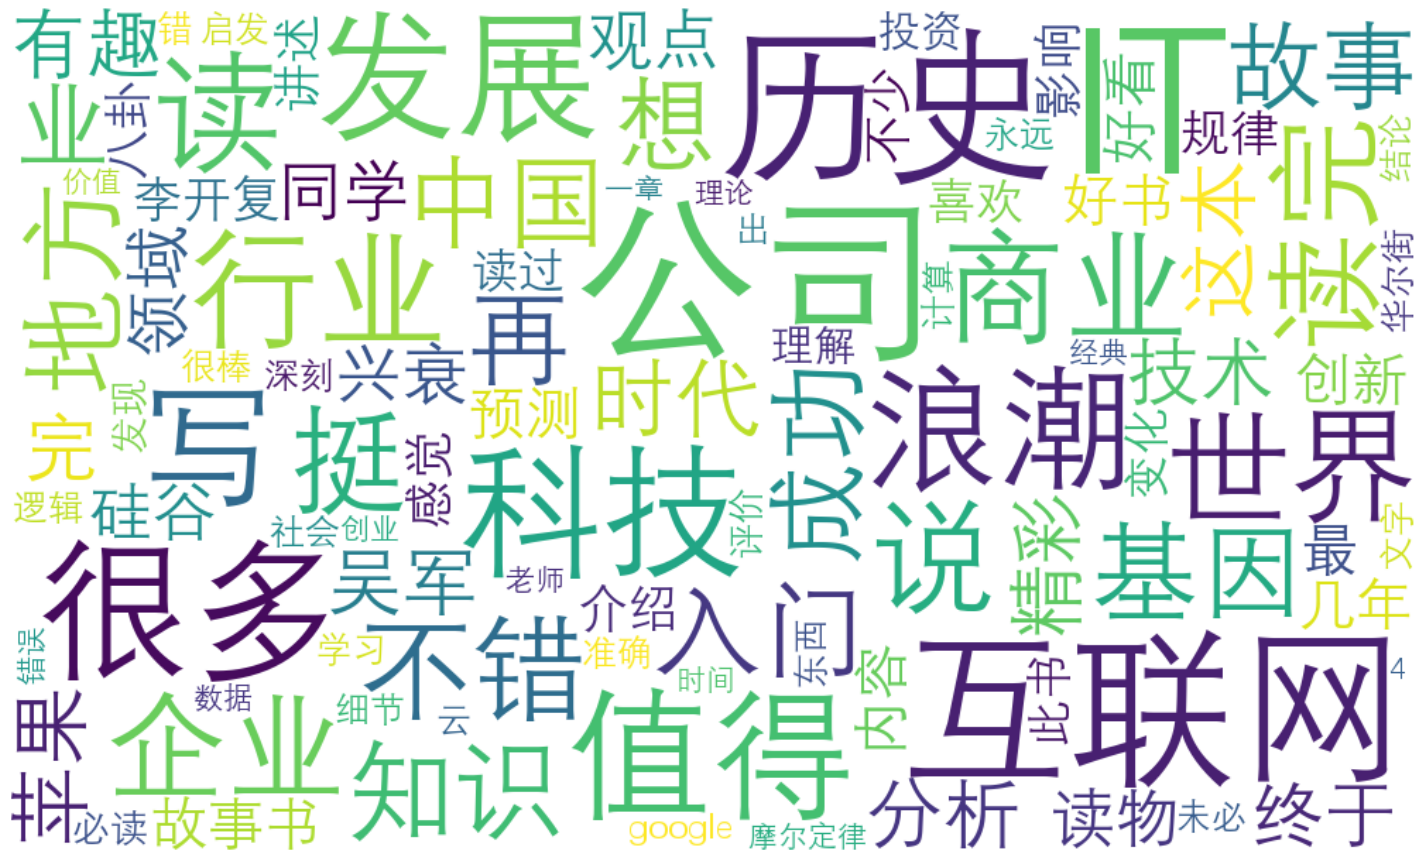

In [8]:
wc = wordcloud.WordCloud(
    font_path = 'C:\Windows\Fonts\Deng.ttf', # 设置字体（这里选择“仿宋”）
    background_color='white',                   # 背景颜色                              # 文字颜色+形状（有mask参数再设定宽高是无效的）
    max_words = 100,                         # 显示词数
    max_font_size = 150,                        # 最大字号
    random_state = 42,                          # 随机数
    width = 1000,                               # 宽度
    height = 600,                               # 高度
    margin = 2,                                 # 边缘
)

wc.generate_from_frequencies(word_counts)                                        # 从字典生成词云
wc.to_file('词频2.png')                                                  # 保存图片
plt.figure('词云')                                                               # 弹框名称与大小
plt.figure(figsize=(20, 20))
plt.subplots_adjust(top=0.99,bottom=0.01,right=0.99,left=0.01,hspace=0,wspace=0) # 调整边距
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')                       # 处理词云
plt.axis('off')                                                                  # 关闭坐标轴
plt.show()  

In [10]:
# -*- coding: utf-8 -*-
import requests
import json
import pandas as pd
headers = {'Content-Type': 'application/json'}
def get_sentiment(text):
  url = 'https://aip.baidubce.com/rpc/2.0/nlp/v1/sentiment_classify?access_token=24.f193b2b132e21945ead5277e46f726c7.2592000.1660544015.282335-26552940'
  data = json.dumps({'text': text})
  res = requests.post(url=url,data=data,headers=headers)
  return res.json()

def get_sentiment_score(text):
  res = get_sentiment(text)
  return [res['items'][0]['positive_prob'],res['items'][0]['negative_prob']]


if __name__ == '__main__':
  df = pd.DataFrame(columns=['text','positive_prob','negative_prob'])
  texts = ['如果要了解互联网，这本是必读之书。', '最近在看这本书和李开复的《世界因你不同》，无意中发现这两本书竟颇为互补──李同学是以自己亲身在苹果，微软，google等的工作经验来谈，更为感性和detail。。而吴同学则更以一种理性的旁观者态度来分析这些IT公司的朝代更替原因。恰恰，李博士几乎在每个IT公司势旺时进入，在势弱时退出。恰好吻合了吴同学的兴衰时间表。。没看过这两本书的同学推荐一起看。', '写得很差，完全不建议阅读。', '恒阅这本书给人最大的启发就是：一个企业能不能活可能是靠自己，但是死不死真的是靠命啊……什么企业基因论，不就是宿命吗？另外，作为一本介绍行业历史的书，如果一定要总结出一些规律，就 必须做更深入严谨的研究，否则就可能出现本书的问题：同样的逻辑用在不同的企业案例上会出现矛盾……', '普及性介绍没有什么洞见9.1分有过誉之嫌', '一本故事会，想不明白这本书在豆瓣上为什么得分这么高。先不说书中的观点是否值得 都有啊。', '细致、全面，绝佳的入门书，只是这个领域的判断众说纷纭，就像张小龙的“我所说的都是错的”，即使再言之凿凿也未必准确。不知道新入门者从此对互联网的认识，有多少已经潜移默化打上了吴军的印记，未必是好事。', '一般一般，中国人特有的成功学气味太重。没有挣大钱或者很有社会影响就不重要吗？未必。。。', '语气太随意，不是一本严肃作品。', '很棒的了解IT领域的入门读物，全面且逻辑清晰。以IT界的科技变革为基础，到产业组织以及与资本的博弈，深刻而全面。', '几个定律加公司兴衰，读出了三体的感觉，很爽。', '有些章不错，但不算是出色的企业历史书，比如突兀的人称切换，比如洋洋洒洒的叙述。PS站在下一个浪潮巅峰的朋友们加油哦，五年十年后不要忘了给我亲友股~', ' 二道贩子，从这里那里摘抄一些八卦轶事，加些武断的评论，拼凑而成。主要是归因太肤浅', '「开始］2011.10.14，目前看了几个公司的故事，感觉有点不够详细、扎实。「读完」2011.10.20,这是在kindle上看的第二本书，已经逐渐习惯EINK，并开始享受科技与传统的融合。开始以为这只是又一本讲述硅谷、讲述那些高科技行业明星的揽财书，但随着阅读的深入发现自己错了，也庆幸自己错了。强烈推荐那些非IT人士也看一看这本书。就像一位德国诗人所说的：“亘古而常青的昨天永远是过去，也永远会再来。”历史总是会与你我一次次的开玩笑，用它螺旋上升中惊人的相似性。', '还可以，但9分也太高了吧，好像没这么好啊', '厌恶华尔街，喜欢斯坦福', '真真切切让人感受到，企业基因对于一个企业长期发展的重要性。因为读过《乔布斯传》，所以对于苹果公司的描述，哎，作者太马虎了啊，很多漏洞。', '除了华尔街的部分还比较有趣，其他的都比较枯燥。', '在吴晓波的书中，我们能看到对中国短暂的现代商业史中消逝公司的惋惜，实际上我们也常假设：某某公司若还存在会如何。但世间没有如果，这本书给了一个很独特的视角：“一个公司的死亡是对社会最后的一次贡献”。既然一个公司无法再适应，那能通过自身的消逝为后来者提供警示和腾出市场资源，伤害的是自己，但有利于整个社会。这个自由主义十足的观点，也适用于我们这个正在极度变化和充满竞争中社会的每个个体。']
  for i in texts:
    df = df.append({"text":i,'positive_prob':get_sentiment_score(i)[0],'negative_prob':get_sentiment_score(i)[1]},ignore_index=True)
  df.to_csv('sentiment_analysis.csv')
  print("正向情感值平均{}".format(df['positive_prob'].mean()))
  print("负向情感值平均{}".format(df['negative_prob'].mean()))

正向情感值平均0.48564367484210524
负向情感值平均0.514356312268421
